In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import pickle
import re # regex
from unidecode import unidecode # accent removal
from tqdm import tqdm # loading bars
from collections import Counter


def pickle_load(filename): # load obj from .pickle file
    with open(filename, "rb") as f:
        obj = pickle.load(f)
    return obj

def pickle_dump(obj, filename): # save obj to .pickle file
    with open(filename, "wb") as f:
        pickle.dump(obj, f)
    return

def json_load(filename): # load obj from .json file
    with open(filename) as f:
        obj = json.load(f)
    return obj

def json_dump(obj, filename): # save obj to .json file
    with open(filename, "w") as f:
        json.dump(obj, f, indent=4)
    return

def my_singular(w): # Transformar cadena minúscula a singular si está en plural
    if w.endswith('s') and len(w)>3:
        if w.endswith('es') and w[-3] in 'nrlsmdc':
            ans = w[:-2] if w[-3]!='c' else w[:-3]+'z'
        else:
            ans = w[:-1]
    else:
        ans = w
    return ans

def count_rows(filename): # Contar rápidamente la cantidad de líneas de un archivo
    with open(filename) as f:
        i = 0
        for _ in f: i+=1
    return i

In [2]:
try: # If already computed and saved to disk
    
    cnt = pickle_load("word_counter.pickle")

except FileNotFoundError:
    
    # Compute it! (takes around 30 seconds)
    
    n = count_rows("words.csv") # set0.csv es el archivo principal de transacciones
    cnt = Counter()
    with open("words.csv") as f:
        for i in tqdm(range(n)):
            l = f.readline()
            for word in l.split():
                cnt[word] += 1
    pickle_dump(cnt, "word_counter.pickle")


In [3]:
for i,(w,k) in enumerate(cnt.most_common(700)):
    print(i,w,k)

0 de 3349043
1 cc 2445507
2 pago 1954854
3 banco 880874
4 servicio 835189
5 factura 592217
6 fija 509784
7 telefonia 509771
8 medio 479076
9 comunicacion 478566
10 financiero 462597
11 actividad 448539
12 comercial 429030
13 no 361861
14 valor 361805
15 publica 355179
16 gobierno 349763
17 idc 330739
18 a 327271
19 administracion 317089
20 generacion 306348
21 pse 282454
22 central 272012
23 y 269772
24 en 263818
25 recarga 263080
26 la 230893
27 telecomunicacion 223049
28 agregado 223008
29 inalambrica 222987
30 compra 222386
31 saldo 220548
32 natural 212405
33 medellin 207328
34 referencia 199689
35 empresa 195867
36 expres 187410
37 esp 186103
38 energia 185649
39 electrica 182777
40 recurso 182646
41 electricidad 182577
42 por 179828
43 ejecutiva 176315
44 credito 174455
45 para 166289
46 certificado 164427
47 transaccion 153878
48 tpni 151742
49 postpago 124729
50 libertad 117520
51 tradicion 117023
52 contrato 116706
53 cpv 115803
54 nit 113199
55 trave 110377
56 ref 100403
57 n

658 schulverein 1269
659 permiso 1267
660 mosquera 1266
661 dito 1264
662 diagnostico 1248
663 menu 1245
664 pack 1245
665 etapa 1240
666 integral 1237
667 sabana 1233
668 economica 1229
669 suscripcion 1227
670 inscripci 1226
671 in 1224
672 skrillcom 1220
673 edif 1219
674 ii 1218
675 uber 1216
676 gana 1215
677 apartamento 1212
678 dato 1205
679 set 1202
680 fideicomiso 1195
681 unidad 1193
682 urb 1193
683 wz 1192
684 pizza 1190
685 allianz 1189
686 escolar 1188
687 pereira 1183
688 andr 1181
689 nica 1179
690 rio 1179
691 facilitadora 1177
692 reguladora 1177
693 uso 1173
694 exte 1169
695 pi 1163
696 proteccion 1162
697 admon 1158
698 hydro 1158
699 codigo 1157


In [4]:
np.random.seed(1995)
n = count_rows("set1.csv")
with open("set1.csv") as f, open("sub1.csv", "w") as g:
    for i in tqdm(range(n)):
        l = f.readline()
        if np.random.random() <= 0.01:
            g.write(l)

100%|██████████| 11818712/11818712 [00:18<00:00, 652636.30it/s]


[(0, '00_deudas'), (1, '01_transferencias'), (2, '02_educacion'), (3, '03_hogar'), (4, '04_tramites'), (5, '05_seguros'), (6, '06_mercado_moda'), (7, '07_domesticos_1'), (8, '08_domesticos_2'), (9, '09_movil'), (10, '10_arriendo'), (11, '11_viajes_transporte'), (12, '12_entretenimiento'), (13, '14_otros')]


100%|██████████| 118055/118055 [00:01<00:00, 69219.66it/s]


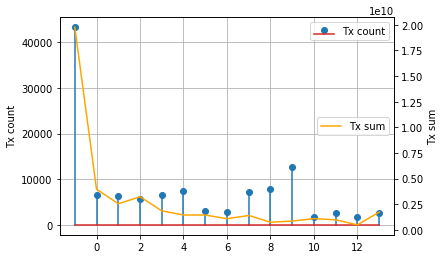

In [5]:
def words_around(keywords):
    cnts = {e: Counter() for e in keywords}
    weird = Counter()
    kwinv = {w:[] for e in keywords for w in keywords[e]}
    for e in keywords:
        for w in keywords[e]:
            kwinv[w].append(e)
    idxs = {e:i for i,e in enumerate(sorted(keywords.keys()))}
    n = count_rows("sub1.csv")
    data = np.zeros((n, 6), np.int64)
    matches = np.zeros((n, len(keywords)), np.float64)
    with open("sub1.csv") as f:
        for i in tqdm(range(n)):
            l = f.readline()
            j = 0 ; k = 0
            while k<5:
                j2 = l.index(',', j)+1
                data[i,k] = round(float(l[j: j2-1]))
                j = j2 ; k+=1
            words = l[j:].split()
            categs = [kwinv[word] for word in words if word in kwinv]
            if len(categs)==0:
                weird.update(Counter(words))
            for cats in categs:
                for e in cats:
                    for w in words:
                        cnts[e][w] += 1
    for e in keywords:
        for w in keywords[e]:
            if w in cnts[e]:
                del cnts[e][w]
    return cnts, weird

def test_keywords(keywords, sub="sub1.csv", export=None, nones=False):
    kwinv = {w:[] for e in keywords for w in keywords[e]}
    for e in keywords:
        for w in keywords[e]:
            kwinv[w].append(e)
    idxs = {e:i for i,e in enumerate(sorted(keywords.keys()))}
    n = count_rows(sub)
    data = np.zeros((n, 6), np.int64)
    matches = np.zeros((n, len(keywords)), np.float64)
    with open(sub) as f:
        for i in tqdm(range(n)):
            l = f.readline()
            j = 0 ; k = 0
            while k<5:
                j2 = l.index(',', j)+1
                data[i,k] = round(float(l[j: j2-1]))
                j = j2 ; k+=1
            words = l[j:].split()
            for w in words:
                if w in kwinv:
                    for e in kwinv[w]:
                        matches[i, idxs[e]] += 1
    err_mask = (matches.sum(axis=1) == 0)
    matches = np.divide(matches, matches.mean(axis=0))
    y = np.argmax(matches, axis=1)
    del matches
    y[err_mask] = -1
    data[:,-1] = y
    idx = np.argsort(data[:,2]*1000000+data[:,3])
    data = data[idx,:]
    tx = data[:,-2].copy()
    y = data[:,-1].copy()
    if export:
        if not nones:
            data = data[y!=-1,:]
        json_dump(keywords, export+".json")
        np.savetxt(export+".csv", X=data, delimiter=',', fmt='%d')
    del data
    return pd.Series(y), pd.Series(tx)



# This is already the final version of the keywords dict.
# It was modified iteratively until reaching this state.
keywords = {
    '00_deudas':[
        'cpv',
        'credito',
        'chevyplan', 'cuota', 'deuda', 'mora', 'pendiente', 'pagare',
        'credimapfre', 'anticipo',
        'visa', 'mastercard', 'amex', 'expres', 'cmr',
        'rapicredit', 'lineru', 'tarjeta', 'prestamo', 'oro',
        'occidente', 'citibank', 'servicredito',
        'leasing', 'inmueble', 'vivienda', 'carro', 'vehiculo',
        'automotor', 'casatoro', 'hipotecario', 'hipoteca',
    ],
    '01_transferencias':[
        # Nequi
        'nequi',
        
        # Finanzas
        'financiero',
        'ahorro', 'cdt', 'fondo', 'inversion', 'forex', 'fiduciaria',
        'giro', 'transferencia', 'daviplata',
        
        # Bancos
        'bancolombia', 'davivienda', 'banco', 'bogota',
        'avvillas', 'occidente',
    ],
    '02_educacion':[
        'cpv',
        'academico',
        'curso', 'educacion', 'educativo',
        'util', 'escolar', 'colegio', 'escuela', 'universidad',
        'matricula', 'icetex', 'javeriana', 'ande',
        'ingenieria', 'eafit',
        'pregrado', 'postgrado', 'posgrado', 'maestria',
        'doctorado', 'tecnologo', 'bachiller', 
        'bachillerato', 'jardin', 'infantil', 'kinder',
        'kindergarden', 'primaria', 'school', 'highscool',
        'tecnica', 'profesional', 'antioquia', 'formacion',
        'pension', 'calasanz', 'inscripcion', 'examen',
        'course', 'english', 'ingles', 'bibliografico',
        'renovacionmatricula', 'carrera', 'establecimiento',
    ],
    '03_hogar':[
        'falabella', 'home', 'center',
        'televisor', 'lavadora', 'calefaccion', 'aire', 'acondicionado',
        'mueble', 'mesa', 'silla', 'plomeria',
        'plomero', 'carpinteria', 'carpintero',
        'estufa', 'piso', 'pared', 'baldosa', 'instalacion',
        'ventana', 'vidrio', 'compra', 'alkosto', 'comida',
        'electrodomestico',
    ],
    '04_tramites':[
        'impuesto', 'renta', 'predial', 'ica', 'iva', 'dian',
        'tributario', 'vehiculo', 'valorizacion', 'automotor',
        'concepto', 'consumo', 'ibc', 'base', 'graval', 'gravamen',
        'ano',
        
        'licencia', 'conduccion', 'comparendo', 'multa',
        'tramite', 'afiliacion', 'registro',
        'liquidacion', 'legalizacion', 'loteria', 'ecommerce',
        'apostilla', 'duplicado', 'pasaporte', 'certificado',
        'certificadosvirtual', 'tradicion', 'libertad',
        'gobierno',
        
        # Salud, pensiones y cesantias
        'arl', 'pension', 'censatia', 'eps',
        'colsanita', 'prepagada', 'consulta', 'medisanita',
        'salud', 'medicina',
    ],
    '05_seguros':[
        'poliza', 'prepoliza',
        'mapfre', 'aseguradora', 'seguro', 'bolivar', 'sura',
        'suramericana', 'liberty', 'equidad', 'metlife', 'qbe',
        'vida', 'estado', 'alfa', 'allianz', 'solidaria',
        'bbva', 'berkley', 'colmena', 'hdi',
        'nacional', 'ano', 'soat', 'colpatria', 'axa',
    ],
    
    '06_mercado_moda': [
        'mercado', 'exito', 'carulla', 'super', 'inter',
        'supermercado', 'alimento', 'fruta', 
        'verdura', 'carne', 'queso', 'leche', 'huevo',
        'cerveza', 'carniceria', 'cerveceria',
        
        'herbalife', 'yanbal', 'amway', 'novaventa',
        
        'mascota', 'hashi', 'perro', 'perra', 'gato', 'gata', 'purina',
        'acuario', 'pez', 'pet',
        
        'falabella', 'leonisa', 'outlet', 'vestuario',
        'zapatos', 'camisa', 'camisas', 'moda', 'ropa',
        'zapateria', 'camiseria', 'jean', 'jeans', 'bluejeans',
        'sastre', 'sastreria', 
        'centro', 'comercial', 'pasarela',
    ],
    
    '07_domesticos_1':[
        'esp',
        'servicio', 'epm', 'empresa', 'publica', 'medellin',
        'electrica', 'electricidad', 'energia', 'acueducto',
        'agua', 'alcantarillado', 'gas', 'serviciogasna',
        'emcaliach', 'codensa', 'aseo', 'generacion', 'natural',
    ],
    '08_domesticos_2':[
        'telefonia', 'fija', 'fijo',
        'multiplay', 'claro', 'etb',
        'telefono', 'telefonica', 'internet', 'fax',
        'comunicacion', 'telecomunicacion',
    ],
    '09_movil':[
        'telefonia', 'movil',
        'recarga', 'celular', 'comunicacion', 'telecomunicacion', 
        'movistar', 'tigo', 'virgin', 'claro', 'etb', 'miavantel',
        'postpago', 'operador',
    ],
    '10_arriendo':[
        'cpv',
        'arriendo', 'administracion', 'conjunto', 'residencial',
        'unidad', 'apartamento',
        'apto', 'numero', 'torre', 'casa', 'mes', 'renta',
        'arrendado', 'arrendamiento', 'alquiler', 'pieza',
        'propietario',
    ],
    '11_viajes_transporte': [
        'pasajero',
        'bus', 'terminal', 'vuelo', 'peaje',
        'avianca', 'bolivariano', 'flota', 'flight', 'satena',
        'viaje', 'viajes', 'agencia', 'guia', 'turismo',
        'turistico', 'turistica', 'hotel', 'hospedaje', 'alojamiento',
        'resort', 'city', 'citytour', 'playa', 'travel',
        'decameron', 'eticket', 'tiquete', 'reserva',
        'booking', 'bog', 'mde', 'pei', 'smr', 'adz', 'ctg', 'clo',
        'bga', 'baq','latam', 'despegar', 'changebooking',
        
        'carga', 'cargo', 'envio', 'servientrega', 'envia',
        'deprisa', 'tcc', 'aereo', 'pesada', 'transporte',
        'uber', 'taxi', 'transportadoras', 'barco', 'peaje',
        'encargo', 'terrestre',
    ],
    '12_entretenimiento':[
        'entretenimiento', 'spa',
        'entrada', 'boleta', 'reserva', 'cine',
        'espectaculo', 'teatro', 'reservacion', 'club',
        'libro', 'netflix', 'pelicula', 'dvd', 'ebook', 'boleteria', 
        'kart', 'bolo', 'bolera', 'estadio',
        'futbol', 'voleibol', 'circo', 'deporte', 'deportivo',
        'restaurante', 'bebida',
        'discoteca', 'bar', 'musica',
        'frisby', 'pizza', 'desayuno', 'comida',
        'suscripcion', 'gimnasio', 'hamburguesa',
    ],
    '14_otros':[
        'tipificado', # no tipificado
        'construccion', 'obra', 'infraestructura', 'ferrocarril',
        
        'donacion', 'beneficiencia', 'teleton', 'pagodonacion',
        'fundacion',
        
        'telesentinel',
    ],
}

print(list(enumerate(sorted(keywords.keys()))), flush=True)

y, tx = test_keywords(keywords, sub="sub1.csv")

z = y.groupby(y).count()
lns1 = plt.stem(z.index, z, label='Tx count')
plt.legend(loc='upper right')
plt.grid()
plt.ylabel('Tx count')
z = tx.groupby(y).sum()
lns2 = plt.gca().twinx().plot(z.index, z, color='orange', label='Tx sum')
plt.ylabel('Tx sum')
plt.legend(loc='center right')

plt.show()

In [6]:
cnts, weird = words_around(keywords)
seen = set()
for e in keywords:
    print(e)
    print(*cnts[e].most_common(50))
    seen.update([w for w,_ in cnts[e].most_common(50)])

print([(w,_) for w,_ in weird.most_common(150) if w not in seen])

100%|██████████| 118055/118055 [00:03<00:00, 31320.00it/s]


02_educacion
('banco', 6012) ('de', 4995) ('cc', 3858) ('servicio', 3768) ('financiero', 3285) ('comercial', 3006) ('gobierno', 2155) ('a', 2132) ('compra', 1606) ('pago', 1453) ('nivel', 565) ('combinan', 555) ('diferente', 555) ('que', 555) ('y', 457) ('derecho', 373) ('no', 360) ('al', 342) ('empleo', 340) ('n', 301) ('para', 298) ('la', 290) ('actividad', 282) ('media', 252) ('licencia', 243) ('conduccion', 242) ('laboral', 241) ('empresa', 239) ('apoyo', 234) ('documento', 210) ('los', 208) ('tpni', 205) ('ti', 203) ('idc', 198) ('sitio', 186) ('linea', 186) ('beneficencia', 181) ('cuenta', 179) ('medell', 171) ('o', 158) ('web', 154) ('en', 153) ('fic', 125) ('colombia', 123) ('ordinario', 120) ('universitaria', 119) ('institucion', 117) ('tecnologica', 117) ('recaudo', 111) ('transporte', 106)
06_mercado_moda
('banco', 21071) ('servicio', 10496) ('financiero', 10323) ('pago', 7116) ('cc', 5372) ('pse', 4095) ('de', 3768) ('cpv', 2808) ('recarga', 2296) ('nequi', 2265) ('credito'

In [7]:
y, tx = test_keywords(keywords, sub="set1.csv", export="set4") # without -1's

100%|██████████| 11818712/11818712 [02:55<00:00, 67273.49it/s]


In [8]:
y, tx = test_keywords(keywords, sub="set1.csv", export="set4_all", nones=1) # with -1's

100%|██████████| 11818712/11818712 [03:11<00:00, 61750.95it/s]


100%|██████████| 11818712/11818712 [03:03<00:00, 64364.10it/s]


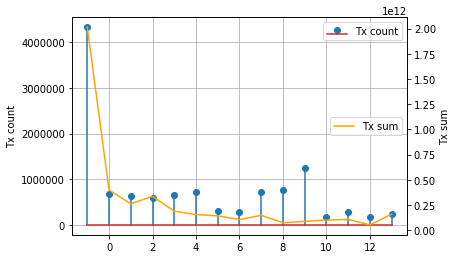

In [9]:
y, tx = test_keywords(keywords, sub="set1.csv")

z = y.groupby(y).count()
lns1 = plt.stem(z.index, z, label='Tx count')
plt.legend(loc='upper right')
plt.grid()
plt.ylabel('Tx count')
z = tx.groupby(y).sum()
lns2 = plt.gca().twinx().plot(z.index, z, color='orange', label='Tx sum')
plt.ylabel('Tx sum')
plt.legend(loc='center right')

plt.show()

In [10]:
json_dump(keywords, "keywords.json")